# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import scipy.sparse

### 1-3. 한글 글꼴 설정(Windows)

### 1-4. 자바 경로 설정(Windows)

### 1-3. 한글 글꼴 설정(Colab)

In [3]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [4]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 1-4. 구글드라이브 연결(Colab)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [7]:
x_train = scipy.sparse.load_npz('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/train_dataset4.npz')
x_test = scipy.sparse.load_npz('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/test_dataset4.npz')
y_train = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/y_train4.csv', index_col=0)
y_test = pd.read_csv('/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/y_test4.csv', index_col=0)

In [8]:
y_test

,label
0,0
1,0
2,3
3,3
4,0
...,...
1107,1
1108,2
1109,1
1110,0


## 3. Machine Learning(N-grams)
* N-gram으로 전처리한 데이터를 이용하여 3개 이상의 Machine Learning 모델 학습 및 성능 분석
> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

In [ ]:
# from sklearn.ensemble import  RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import *

### 3-1. Model 1

In [ ]:
# model_rf = RandomForestClassifier()

# model_rf.fit(x_train.toarray(), y_train)

<ipython-input-14-cc1c8cdf5606>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train.toarray(), y_train)


RandomForestClassifier()

In [ ]:
# y_pred_rf = model_rf.predict(x_test.toarray())

In [ ]:
# y_pred_rf.shape, y_test.shape

((1112,), (1112, 1))

In [ ]:
# print(confusion_matrix(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

[[458  19  23   9   0]
 [ 70 104  23  11   0]
 [ 68   5 123   8   0]
 [ 19   6  12 117   2]
 [  5   2   1   1  26]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       509
           1       0.76      0.50      0.60       208
           2       0.68      0.60      0.64       204
           3       0.80      0.75      0.77       156
           4       0.93      0.74      0.83        35

    accuracy                           0.74      1112
   macro avg       0.78      0.70      0.73      1112
weighted avg       0.75      0.74      0.74      1112



### 3-2. Model 2

In [ ]:
# model_svm = SVC()
# model_svm.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# y_pred_svm = model_svm.predict(x_test)

In [ ]:
# print(confusion_matrix(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))

[[464  10  30   5   0]
 [ 37 148  19   4   0]
 [ 50   3 148   3   0]
 [ 18   6  10 122   0]
 [  4   4   0   4  23]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       509
           1       0.87      0.71      0.78       208
           2       0.71      0.73      0.72       204
           3       0.88      0.78      0.83       156
           4       1.00      0.66      0.79        35

    accuracy                           0.81      1112
   macro avg       0.85      0.76      0.80      1112
weighted avg       0.82      0.81      0.81      1112



### 3-3. Model 3

In [ ]:
# !pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 18.1 MB/s eta 0:00:00


In [ ]:
# from catboost import CatBoostClassifier, Pool
# from sklearn.model_selection import train_test_split

In [ ]:
# x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train, y_train, 
#                                                           train_size=0.8,
#                                                           random_state=42)

# train_dataset = Pool(x_train_2.toarray(), y_train_2)

In [ ]:
# model_cb = CatBoostClassifier()

# model_cb.fit(x_train, y_train)

Learning rate set to 0.083068
0:	learn: 1.5509595	total: 196ms	remaining: 3m 15s
1:	learn: 1.4925817	total: 320ms	remaining: 2m 39s
2:	learn: 1.4512270	total: 430ms	remaining: 2m 23s
3:	learn: 1.4189463	total: 539ms	remaining: 2m 14s
4:	learn: 1.3930197	total: 650ms	remaining: 2m 9s
5:	learn: 1.3691744	total: 762ms	remaining: 2m 6s
6:	learn: 1.3478544	total: 878ms	remaining: 2m 4s
7:	learn: 1.3210307	total: 995ms	remaining: 2m 3s
8:	learn: 1.3049758	total: 1.11s	remaining: 2m 2s
9:	learn: 1.2860091	total: 1.22s	remaining: 2m 1s
10:	learn: 1.2669495	total: 1.34s	remaining: 2m
11:	learn: 1.2529297	total: 1.45s	remaining: 1m 59s
12:	learn: 1.2409593	total: 1.57s	remaining: 1m 59s
13:	learn: 1.2285982	total: 1.68s	remaining: 1m 58s
14:	learn: 1.2178972	total: 1.8s	remaining: 1m 57s
15:	learn: 1.2062084	total: 1.91s	remaining: 1m 57s
16:	learn: 1.1916095	total: 2.03s	remaining: 1m 57s
17:	learn: 1.1823169	total: 2.14s	remaining: 1m 56s
18:	learn: 1.1709021	total: 2.25s	remaining: 1m 56s
19:

In [ ]:
# y_pred_cb = model_cb.predict(x_test)

In [ ]:
# print(confusion_matrix(y_test, y_pred_cb))
# print(classification_report(y_test, y_pred_cb))

[[435  19  29   2   0]
 [ 99 120   7   4   0]
 [ 77   9 110   6   0]
 [ 46  12   8 100   0]
 [  3   0   0   0  26]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       485
           1       0.75      0.52      0.62       230
           2       0.71      0.54      0.62       202
           3       0.89      0.60      0.72       166
           4       1.00      0.90      0.95        29

    accuracy                           0.71      1112
   macro avg       0.80      0.69      0.73      1112
weighted avg       0.73      0.71      0.70      1112



### 3-4. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import scikitplot as skplt

#### HyperParameter Tuning / CatBoost

In [ ]:
# param_cb = {'depth'       : [4, 6],
#             'l2_leaf_reg' : [2, 10, 20, 30],
#             'logging_level':['Silent'],
#             'leaf_estimation_iterations': [10]
#             }

# model_cb_grid = GridSearchCV(estimator=model_cb, param_grid = param_cb,
#                             cv = 2, n_jobs=-1, verbose=3)

In [ ]:
# model_cb_grid.fit(x_train.toarray(), y_train, verbose=3)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f324f0e6ca0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'l2_leaf_reg': [2, 10, 20, 30],
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent']},
             verbose=3)

In [ ]:
# best_param = model_cb_grid.best_params_
# best_param

{'depth': 6,
 'l2_leaf_reg': 2,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent'}

In [ ]:
# model_cb_best = CatBoostClassifier(iterations=1000,
#                                    depth=best_param['depth'],
#                                    l2_leaf_reg=best_param['l2_leaf_reg'],
#                                    leaf_estimation_iterations=10,
#                                    use_best_model=True,
#                                    logging_level='Silent')

NameError: ignored

#### HyperParameter Tuning / SVC

In [ ]:
# param_svc = {'C'            : [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
#             'kernel'        : ['rbf'],
#             'random_state' : [1225]
#             }

# model_svc = SVC()

# model_svc_grid = GridSearchCV(estimator=model_svc, param_grid = param_svc,
#                             cv = 3, n_jobs=-1, verbose=3)

In [ ]:
# model_svc_grid.fit(x_train.toarray(), y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'kernel': ['rbf'], 'random_state': [1225]},
             verbose=3)

In [ ]:
# best_param = model_svc_grid.best_params_
# best_param

{'C': 10, 'kernel': 'rbf', 'random_state': 1225}

#### Apply best parameter of SVC

In [ ]:
# model_svc_best = SVC(C=best_param['C'],
#                     # degree=4,
#                     kernel='rbf',
#                     random_state=1225)

In [ ]:
# model_svc_best.fit(x_train.toarray(), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, random_state=1225)

In [ ]:
# y_pred_svc = model_svc_best.predict(x_test.toarray())

In [ ]:
# print(confusion_matrix(y_test, y_pred_svc))
# print(classification_report(y_test, y_pred_svc))

[[462  11  29   7   0]
 [ 25 159  18   6   0]
 [ 42   4 155   3   0]
 [ 14   8  10 124   0]
 [  3   4   0   3  25]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       509
           1       0.85      0.76      0.81       208
           2       0.73      0.76      0.75       204
           3       0.87      0.79      0.83       156
           4       1.00      0.71      0.83        35

    accuracy                           0.83      1112
   macro avg       0.86      0.79      0.82      1112
weighted avg       0.83      0.83      0.83      1112



#### Apply best parameter of CatBoost  

In [ ]:
# model_cb_best = CatBoostClassifier(iterations=1000,
#                                     depth=6,
#                                     l2_leaf_reg=2,
#                                     leaf_estimation_iterations=10,
#                                     use_best_model=True,
#                                     logging_level='Silent')

In [ ]:
# model_cb_best.fit(train_dataset, eval_set=(x_val_2.toarray(), y_val_2))

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

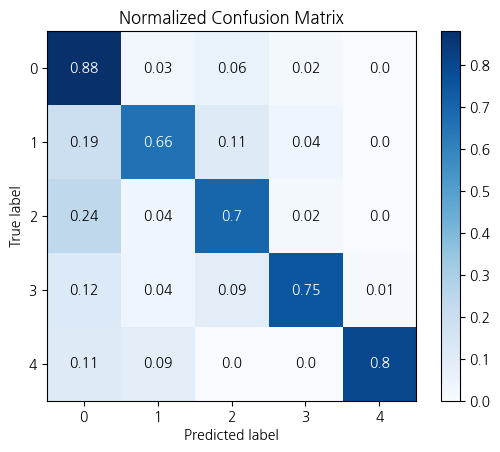

In [ ]:
# y_pred_cb = model_cb_best.predict(x_test.toarray())
# skplt.metrics.plot_confusion_matrix(y_test, y_pred_cb, normalize=True)

In [ ]:
# print(confusion_matrix(y_test, y_pred_cb))
# print(classification_report(y_test, y_pred_cb))

[[447  17  33  11   1]
 [ 40 137  22   9   0]
 [ 49   8 142   5   0]
 [ 18   6  14 117   1]
 [  4   3   0   0  28]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       509
           1       0.80      0.66      0.72       208
           2       0.67      0.70      0.68       204
           3       0.82      0.75      0.79       156
           4       0.93      0.80      0.86        35

    accuracy                           0.78      1112
   macro avg       0.81      0.76      0.78      1112
weighted avg       0.78      0.78      0.78      1112



#### Auto ML

In [ ]:
# !pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# from pycaret.classification import *
# exp_class101 = setup(data=x_train, target=y_train, , session_id=123)

ValueError: ignored

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential

from sklearn.metrics import *

### 4-1. DNN

In [16]:
def Model_DNN(input_shape, x_train, y_train, num_of_hidden_layers=128):
    clear_session()
    
    model_dnn = Sequential()

    model_dnn.add(Input(shape=(input_shape)))
    model_dnn.add(Flatten())
    model_dnn.add(Dense(num_of_hidden_layers, activation='relu'))
    model_dnn.add(Dropout(0.2))
    model_dnn.add(Dense(5, activation='softmax'))

    model_dnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'],
                    optimizer='adam')

    model_dnn.summary()

    es = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        restore_best_weights=True)

    model_dnn.fit(x_train, y_train, epochs=100, batch_size=64,
                  validation_split=0.3, verbose=1, callbacks=[es])
    
    model_dnn.evaluate(x_test.toarray(), y_test)
    return model_dnn

In [11]:
dnn = Model_DNN(x_train.shape[1], x_train.toarray(), y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 19284)             0         
                                                                 
 dense (Dense)               (None, 128)               2468480   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2,469,125
Trainable params: 2,469,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 6s 15ms/step - loss: 1.4419 - accuracy: 0.4149 - val_loss: 1.2537 - val_accuracy: 0.4211
Epoch 2/100
29/29 [=================

In [12]:
y_pred_dnn = dnn.predict(x_test.toarray())

y_pred_dnn = np.argmax(y_pred_dnn, axis=1)
y_pred_dnn.flatten()
# y_pred_dnn
print(confusion_matrix(y_test, y_pred_dnn))
print(classification_report(y_test, y_pred_dnn))

35/35 [==============================] - 0s 2ms/step
[[455  17  33   4   0]
 [ 23 164  15   6   0]
 [ 45   8 148   3   0]
 [ 10   6   7 131   2]
 [  5   4   0   4  22]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       509
           1       0.82      0.79      0.81       208
           2       0.73      0.73      0.73       204
           3       0.89      0.84      0.86       156
           4       0.92      0.63      0.75        35

    accuracy                           0.83      1112
   macro avg       0.84      0.78      0.80      1112
weighted avg       0.83      0.83      0.83      1112



### 4-2. 1-D CNN

In [20]:
def CNN_1D(input_shape, x_train, y_train):
    clear_session()
    model = Sequential()

    model.add(Input(shape=(input_shape)))
    model.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='swish'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'],
                    optimizer='adam')

    model.summary()

    es = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        restore_best_weights=True)

    model.fit(x_train, y_train, epochs=100, batch_size=64,
                  validation_split=0.3, verbose=1, callbacks=[es])
    
    # model.evaluate(x_test.toarray(), y_test)
    return model

In [21]:
print(x_train.shape)
x_train = x_train.toarray()
x_train = np.expand_dims(x_train, axis=-1)
print(x_train.shape)

(2594, 19284, 1)


AttributeError: ignored

In [22]:
cnn_1d = CNN_1D([19284, 1], x_train, y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19282, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9641, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 308512)            0         
                                                                 
 dense (Dense)               (None, 128)               39489664  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

In [23]:
y_pred_cnn = cnn_1d.predict(x_test.toarray())

y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
y_pred_cnn.flatten()
# y_pred_dnn
print(confusion_matrix(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))

35/35 [==============================] - 0s 9ms/step
[[430  26  47   6   0]
 [ 17 169  16   6   0]
 [ 34  11 157   2   0]
 [ 10  12  10 123   1]
 [  3   3   0   4  25]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       509
           1       0.76      0.81      0.79       208
           2       0.68      0.77      0.72       204
           3       0.87      0.79      0.83       156
           4       0.96      0.71      0.82        35

    accuracy                           0.81      1112
   macro avg       0.83      0.79      0.80      1112
weighted avg       0.82      0.81      0.81      1112



### 4-3. LSTM

In [29]:
def Model_LSTM(input_shape, x_train, y_train):
    clear_session()
    model = Sequential()

    model.add(Input(shape=(input_shape)))
    model.add(LSTM(32, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'],
                    optimizer='adam')

    model.summary()

    es = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        restore_best_weights=True)

    model.fit(x_train, y_train, epochs=100, batch_size=64,
                  validation_split=0.3, verbose=1, callbacks=[es])
    
    # model.evaluate(x_test.toarray(), y_test)
    return model

In [30]:
lstm = Model_LSTM([19284, 1], x_train, y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19284, 32)         4352      
                                                                 
 flatten (Flatten)           (None, 617088)            0         
                                                                 
 dense (Dense)               (None, 128)               78987392  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 78,992,389
Trainable params: 78,992,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 18s 515ms/step - loss: 1.4426 - accuracy: 0.3857 - val_loss: 1.6087 - val_accuracy: 0.5122
Epoch 2/100
29/29 [=============

In [31]:
y_pred_lstm = lstm.predict(x_test.toarray())

y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_pred_lstm.flatten()
# y_pred_dnn
print(confusion_matrix(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

35/35 [==============================] - 6s 164ms/step
[[443  30  30   6   0]
 [ 33 153  13   9   0]
 [ 59  10 131   4   0]
 [ 14   8   3 131   0]
 [  5   5   0   7  18]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       509
           1       0.74      0.74      0.74       208
           2       0.74      0.64      0.69       204
           3       0.83      0.84      0.84       156
           4       1.00      0.51      0.68        35

    accuracy                           0.79      1112
   macro avg       0.82      0.72      0.76      1112
weighted avg       0.79      0.79      0.78      1112



## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)